<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/TS1_Assignment_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="section-one"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">Initial Setup</p>
</div>

<a id="section-one_one"></a>
## Import Standard Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<a id="section-one_two"></a>
## Import Time Series Data : Train Passenger Traffic

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/My Drive/TS1")

Mounted at /content/drive


In [5]:
!ls

##Let's look at the dataset. It consists of Passengers boarding the train everyday from 1949 to 1961. Our objective is to predict the number of passengers in the coming years, from 1962.

In [8]:
data = pd.read_csv("/content/train-passenger-traffic.csv", header=None)
data.columns = ['Month', 'Passengers']
data.Month = pd.to_datetime(data.Month, format='%Y-%m')
data.Passengers = data.Passengers.astype("float64")
data = data.set_index('Month')
data.head(5)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Question 1:
### Plot time Time Series Data, handle the missing values using different methods, plot and check the imputation method and finalize one method.

<a id="section-two"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">Time Series Analysis</p>
</div>

<a id="section-two_one"></a>
## Plot Time Series Data

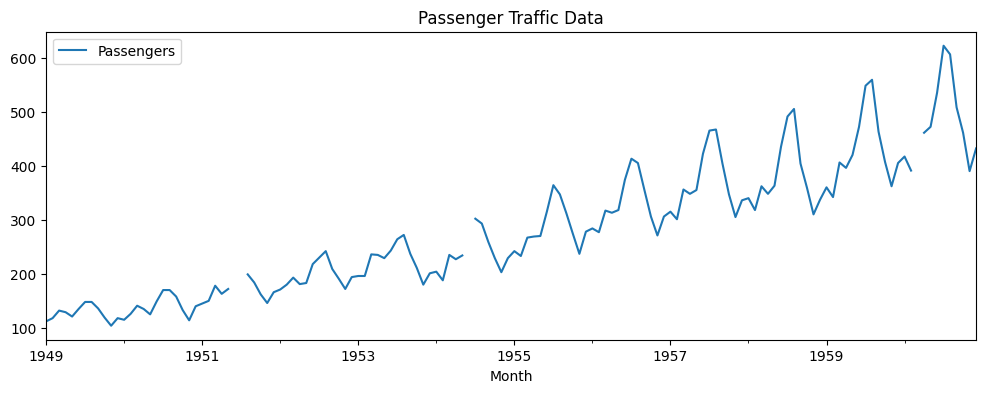

In [9]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Passenger Traffic Data')
plt.show(block=False)

<a id="section-two_two"></a>
## Missing Value Treatment

<a id="section-two_two_one"></a>
### Mean Imputation

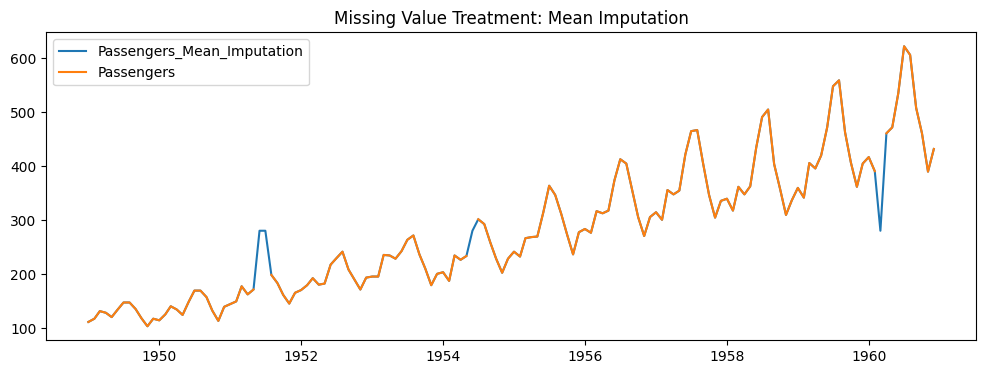

In [10]:
data['Passengers_Mean_Imputation'] = data.Passengers.fillna(data.Passengers.mean())

plt.figure(figsize=(12,4))
plt.plot(data.Passengers_Mean_Imputation, label='Passengers_Mean_Imputation')
plt.plot(data.Passengers, label='Passengers')
plt.legend(loc='best')
plt.title('Missing Value Treatment: Mean Imputation')
plt.show(block=False)

<a id="section-two_two_two"></a>
### Linear Interpolation

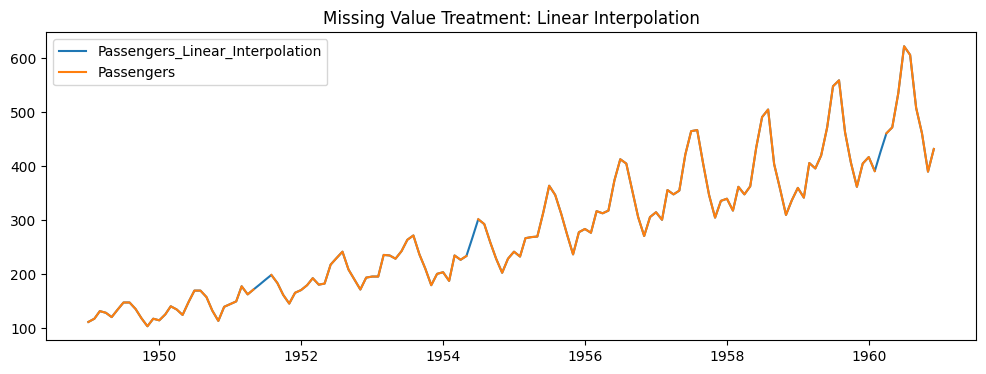

In [11]:
data['Passengers_Linear_Interpolation'] = data.Passengers.interpolate(method='linear')

plt.figure(figsize=(12,4))
plt.plot(data.Passengers_Linear_Interpolation, label='Passengers_Linear_Interpolation')
plt.plot(data.Passengers, label='Passengers')
plt.legend(loc='best')
plt.title('Missing Value Treatment: Linear Interpolation')
plt.show(block=False)

<a id="section-two_two_three"></a>
### Use Linear Interpolation to Impute Missing Value

In [16]:
#data.Passengers = data.Passengers_Linear_Interpolation
#data.drop(columns=['Passengers_Linear_Interpolation'],inplace=True)
#data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<a id="section-two_three"></a>
## Outlier Detection

<a id="section-two_three_one"></a>
### Box Plot & Interquartile Range

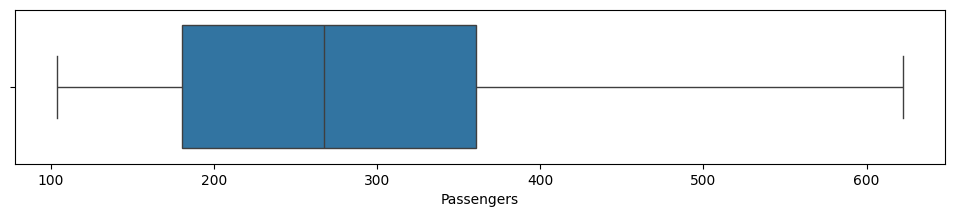

In [17]:
import seaborn as sns

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x = data.Passengers, whis = 1.5)

<a id="section-two_three_two"></a>
### Histogram Plot

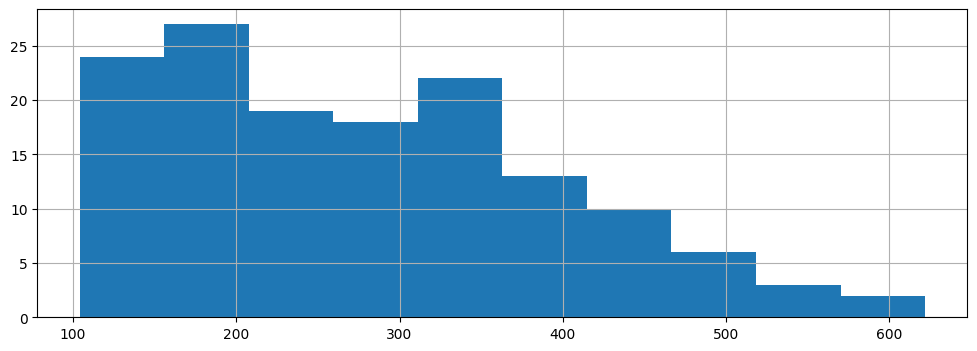

In [18]:
fig = data.Passengers.hist(figsize=(12,4))

## Question 2:
### Under the title “Time Series Decomposition”, perform additive and multiplicative decomposition using “statsmodels” package [refer to statsmodels documentation to identify the right function]. Also, plot the decomposed output.

No outliers detected in this time series data

<a id="section-two_four"></a>
## Time Series Decomposition

<a id="section-two_four_one"></a>
### Additive Seasonal Decompostion

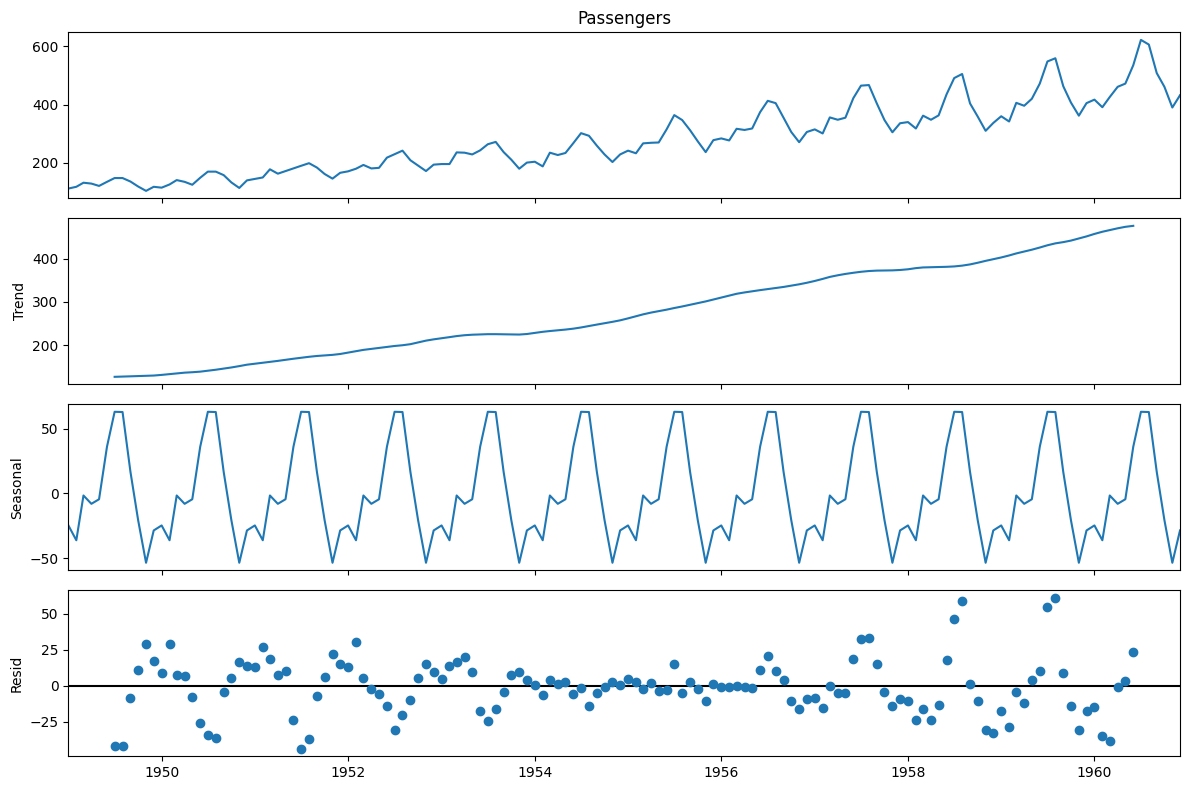

In [19]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()

<a id="section-two_four_two"></a>
### Multiplicative Seasonal Decomposition

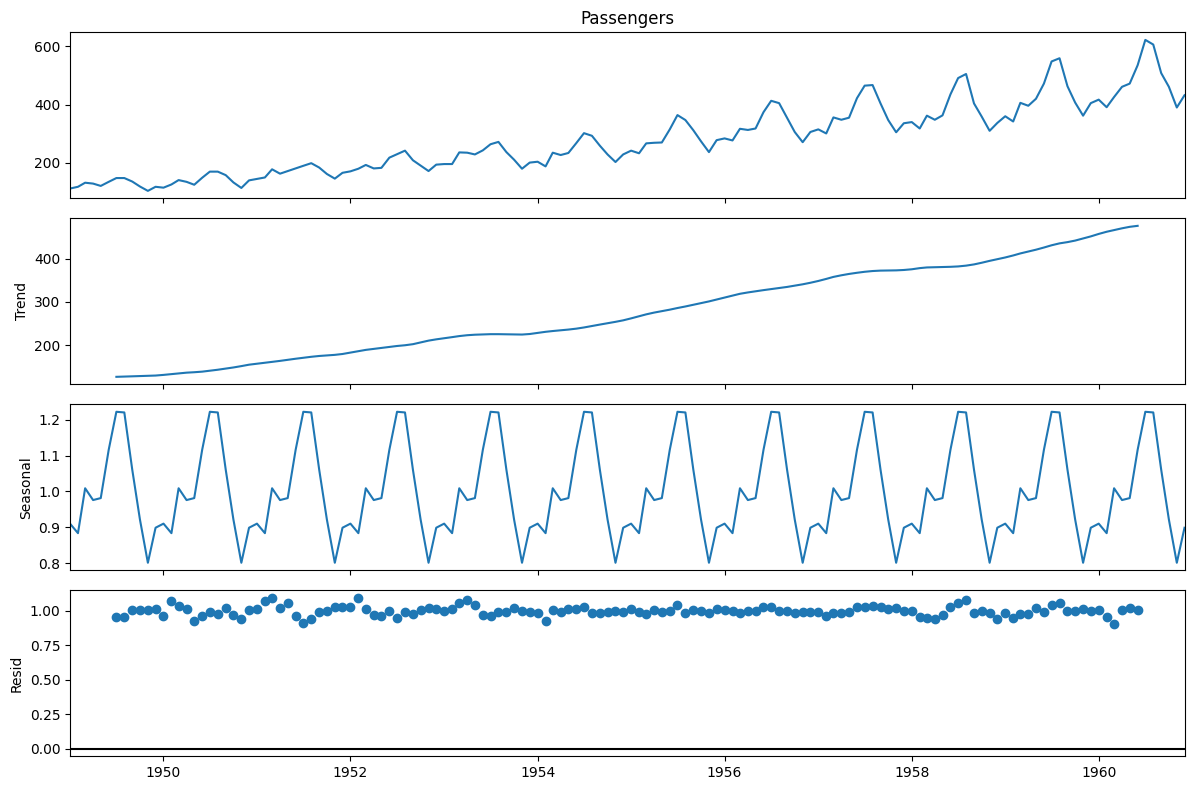

In [20]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()

<a id="section-three"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">Build and Evaluate Time Series Forecast</p>
</div>

<a id="section-three_one"></a>
## Splitting Time Series into Training and Test Series

In [21]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

## Question 3:
###Run forecasting using the following methods, plot them, and use RMSE and MAPE metrics for each of them:
###Simple Moving Average
###Simple Exponential Smoothing
###Holt’s Exponential Smoothing
###Holt Winter’s Additive Smoothing
###Holt Winter’s Multiplicative Smoothing


<a id="section-four"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">Simple Time Series Methods</p>
</div>

<a id="section-four_one"></a>
## Naive Method

In [22]:
def create_method(title, func):
    y_hat = test.copy()
    y_hat[title] = func
    return y_hat

y_hat_naive = create_method('naive_forecast', train.Passengers[train_len - 1])

<a id="section-four_one_one"></a>
### Plot Train, Test and Forecast

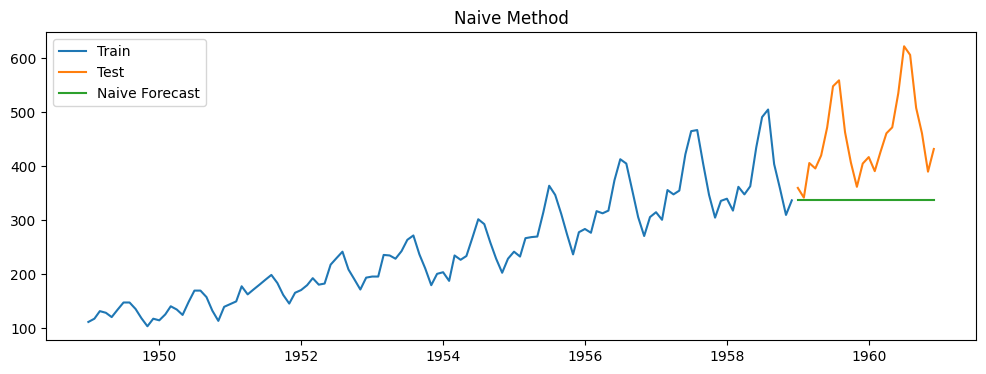

In [23]:
def plot_method(y_hat, title):
    plt.figure(figsize=(12,4))
    plt.plot(train.Passengers, label = 'Train')
    plt.plot(test.Passengers, label = 'Test')
    plt.plot(y_hat, label = title + ' Forecast')
    plt.legend(loc='best')
    plt.title(title + ' Method')
    plt.show()

plot_method(y_hat_naive.naive_forecast, 'Naive')

<a id="section-four_one_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [24]:
from sklearn.metrics import mean_squared_error

def calculate_error(y_hat, title, prevResults, length):
    rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat[length:])).round(2)
    mape = np.round(np.mean(np.abs(test.Passengers-y_hat[length:])/test.Passengers)*100, 2)

    results = pd.DataFrame({'Method':[title + ' Method'], 'RMSE':[rmse], 'MAPE':[mape]})
    results = pd.concat([prevResults, results])
    return results

results = calculate_error(y_hat_naive.naive_forecast, 'Naive', None, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


<a id="section-four_two"></a>
## Simple Average Method

In [25]:
y_hat_avg = create_method('avg_forecast', train.Passengers.mean())

<a id="section-four_two_one"></a>
### Plot Train, Test and Forecast

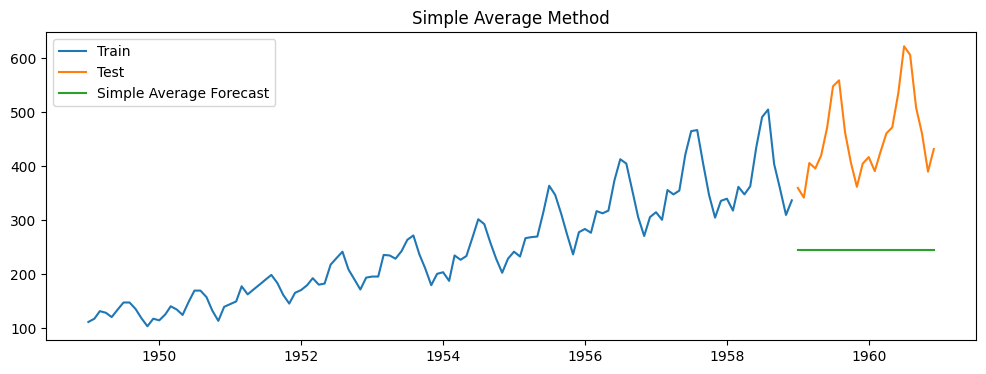

In [26]:
plot_method(y_hat_avg.avg_forecast, 'Simple Average')

<a id="section-four_two_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [27]:
results = calculate_error(y_hat_avg.avg_forecast, 'Simple Average', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28


<a id="section-four_three"></a>
## Simple Moving Average Method

In [28]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data.Passengers.rolling(ma_window).mean()
y_hat_sma.sma_forecast[train_len:] = y_hat_sma.sma_forecast[train_len-1]

<a id="section-four_three_one"></a>
### Plot Train, Test and Forecast

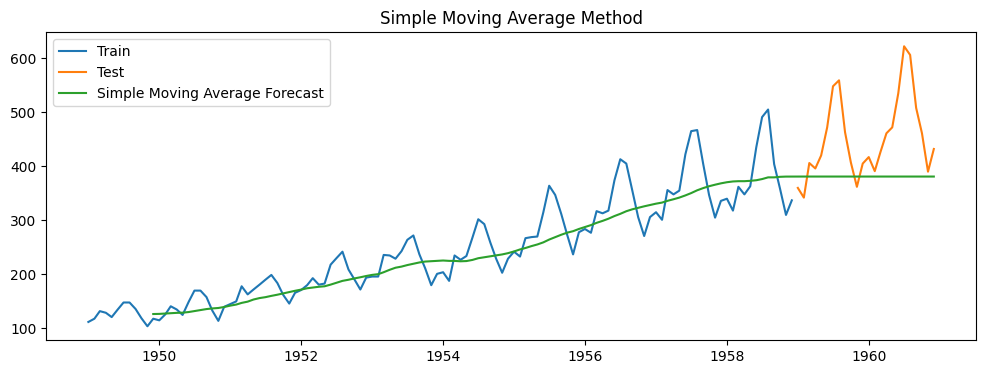

In [29]:
plot_method(y_hat_sma.sma_forecast, 'Simple Moving Average')

<a id="section-four_three_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [30]:
results = calculate_error(y_hat_sma.sma_forecast, 'Simple Moving Average', results, train_len)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54


<a id="section-five"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;">Exponential Smoothing Methods</p>
</div>

<a id="section-five_one"></a>
## Simple Exponential Smoothing

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train.Passengers)
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<a id="section-five_one_one"></a>
### Plot Train, Test and Forecast

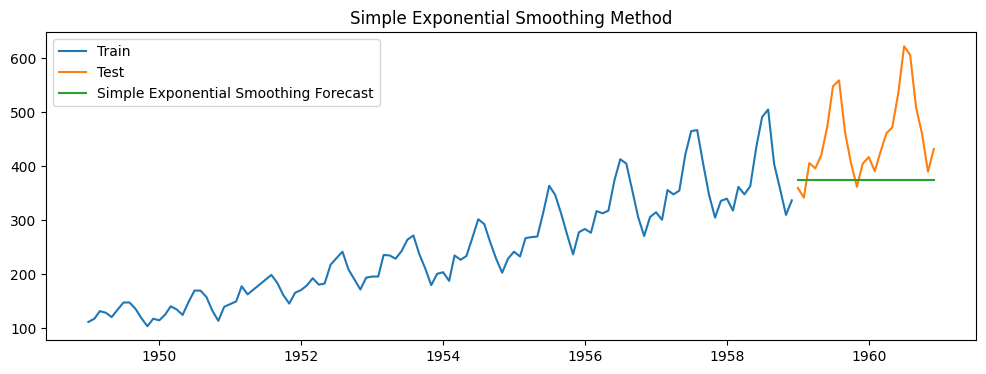

In [32]:
plot_method(y_hat_ses.ses_forecast, 'Simple Exponential Smoothing')

<a id="section-five_one_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [33]:
results = calculate_error(y_hat_ses.ses_forecast, 'Simple Exponential Smoothing', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Exponential Smoothing Method,107.65,16.49


<a id="section-five_two"></a>
## Holt's Exponential Smoothing Method with Trend

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.array(train.Passengers), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

print(model_fit.params)

y_hat_holt = create_method('holt_forecast', model_fit.forecast(24))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.0606060606060677, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


<a id="section-five_two_one"></a>
### Plot Train, Test and Forecast

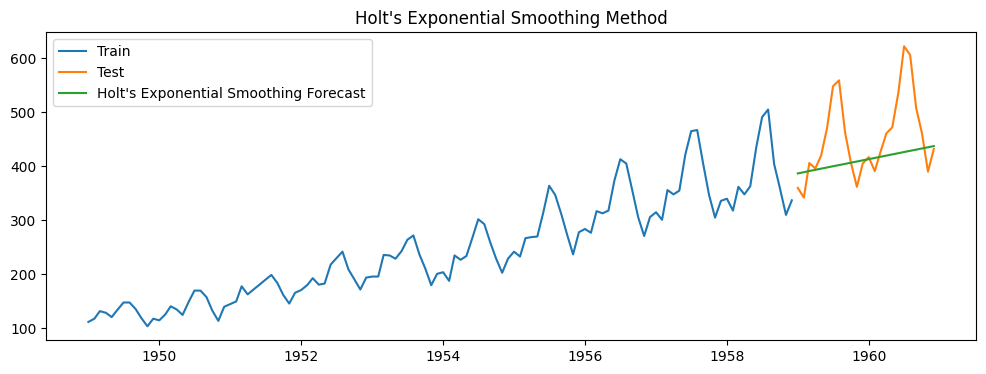

In [35]:
plot_method(y_hat_holt.holt_forecast, 'Holt\'s Exponential Smoothing')

<a id="section-five_two_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [36]:
results = calculate_error(y_hat_holt.holt_forecast, 'Holt\'s Exponential Smoothing', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt's Exponential Smoothing Method,80.91,11.39


<a id="section-five_three"></a>
## Holt Winter's Additive Method with Trend & Seasonality

In [37]:
model = ExponentialSmoothing(np.asarray(train.Passengers), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)

print(model_fit.params)

y_hat_hwa = create_method('hwa_forecast', model_fit.forecast(24))

{'smoothing_level': 0.23612063276630396, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.7638793672336961, 'damping_trend': nan, 'initial_level': 119.14185705842867, 'initial_trend': 2.2768271963167845, 'initial_seasons': array([ -9.41874624,  -3.89247457,   8.62513776,   3.53436072,
        -5.16354902,   8.98245201,  21.24772643,  19.32894568,
         5.24064325, -13.60517462, -28.28868377, -12.13850507]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


<a id="section-five_three_one"></a>
### Plot Train, Test and Forecast

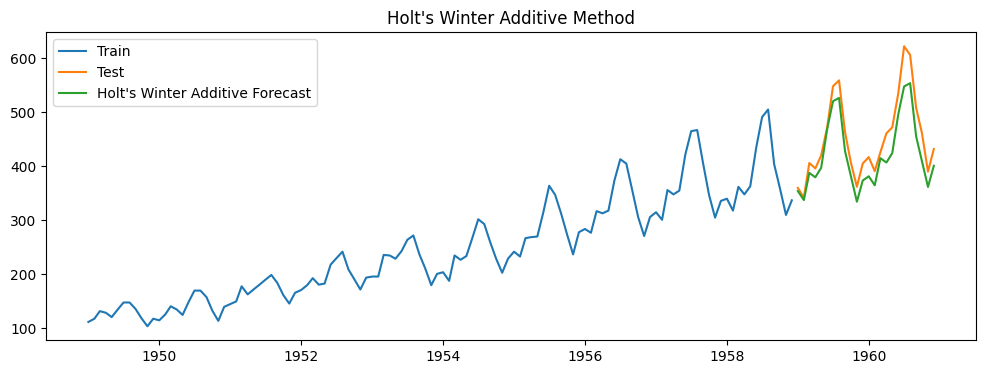

In [38]:
plot_method(y_hat_hwa.hwa_forecast, 'Holt\'s Winter Additive')

<a id="section-five_three_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [39]:
results = calculate_error(y_hat_hwa.hwa_forecast, 'Holt\'s Winter Additive', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt's Exponential Smoothing Method,80.91,11.39
0,Holt's Winter Additive Method,35.87,6.72


<a id="section-five_four"></a>
## Holt Winter's Multiplicative Method with Trend & Seasonality

In [40]:
final_model = ExponentialSmoothing(np.asarray(train.Passengers), trend='mul',seasonal='mul',seasonal_periods=12)
model_fit = final_model.fit(optimized=True)

print(model_fit.params)

y_hat_hwm = create_method('hwm_forecast', model_fit.forecast(24))

{'smoothing_level': 0.38634313459397573, 'smoothing_trend': 2.827433394973768e-10, 'smoothing_seasonal': 0.613656865333717, 'damping_trend': nan, 'initial_level': 110.76924068973646, 'initial_trend': 1.009662906352793, 'initial_seasons': array([1.00143675, 1.05794968, 1.16814297, 1.10792826, 1.01595564,
       1.1124553 , 1.21445836, 1.20729699, 1.09791605, 0.95146596,
       0.84276405, 0.98314622]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


<a id="section-five_four_one"></a>
### Plot Train, Test and Forecast

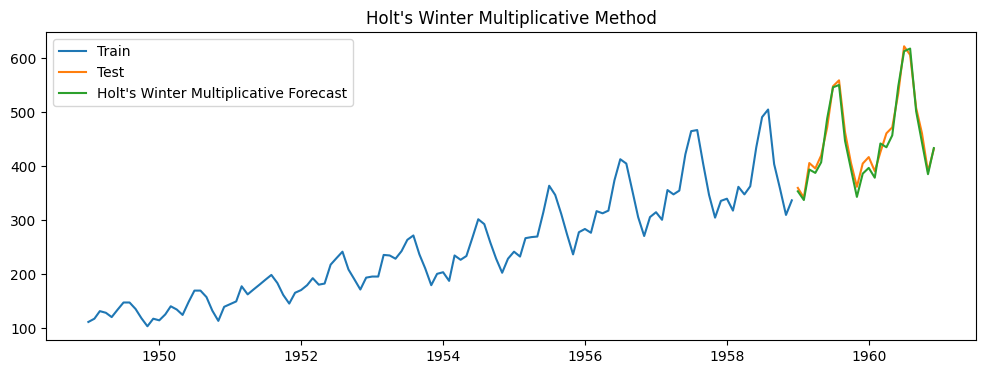

In [41]:
plot_method(y_hat_hwm.hwm_forecast, 'Holt\'s Winter Multiplicative')

<a id="section-five_four_two"></a>
### Calculate RMSE and MAPE to Evaluate Forecast

In [42]:
results = calculate_error(y_hat_hwm.hwm_forecast, 'Holt\'s Winter Multiplicative', results, 0)
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Exponential Smoothing Method,107.65,16.49
0,Holt's Exponential Smoothing Method,80.91,11.39
0,Holt's Winter Additive Method,35.87,6.72
0,Holt's Winter Multiplicative Method,13.36,2.71


## Question 4: Perform the below stationarity tests and also the below transformations and print the results:
###ADF
###KPSS
###Box-Cox Transformation (also plot the transformed series)
###Differencing (also plot the differenced series)
###ACF Plot
###PACF Plot

<a id="section-six"></a>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">
</div>

<a id="section-six_one"></a>
## Stationary vs Non-stationary Time Series

<a id="section-six_one_one"></a>
### Time Series Plot

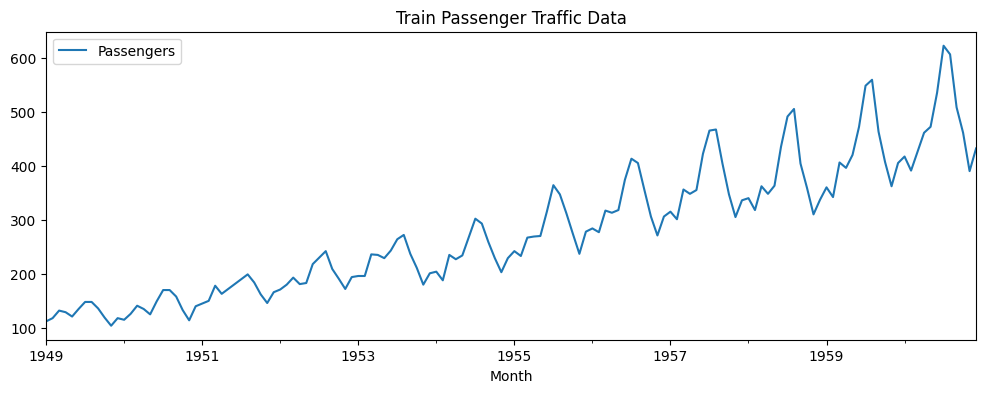

In [43]:
data.Passengers.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Train Passenger Traffic Data')
plt.show()

<a id="section-six_one_two"></a>
### Augumented Dickey-Fuller (ADF) Test

In [46]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data.Passengers)
print(adf_test)
print('ADF Statistics: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

(0.8946087940823881, 0.9930195647605924, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 993.7736365973918)
ADF Statistics: 0.894609
Critical Value @ 0.05: -2.88
p-value: 0.993020


<a id="section-six_one_three"></a>
### KPSS Test

In [47]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data.Passengers)
print(kpss_test)
print('KPSS Statistics: %f' % kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

(1.651189746942162, 0.01, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Statistics: 1.651190
Critical Value @ 0.05: 0.46
p-value: 0.010000


<a id="section-six_two"></a>
## Box Cox Transformation

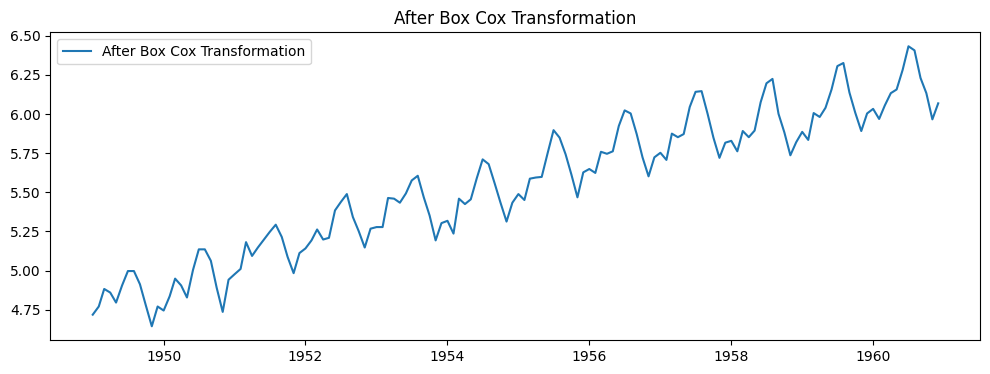

In [48]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data.Passengers, lmbda=0), index = data.index)

plt.figure(figsize=(12, 4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')
plt.show()

<a id="section-six_three"></a>
## Differencing

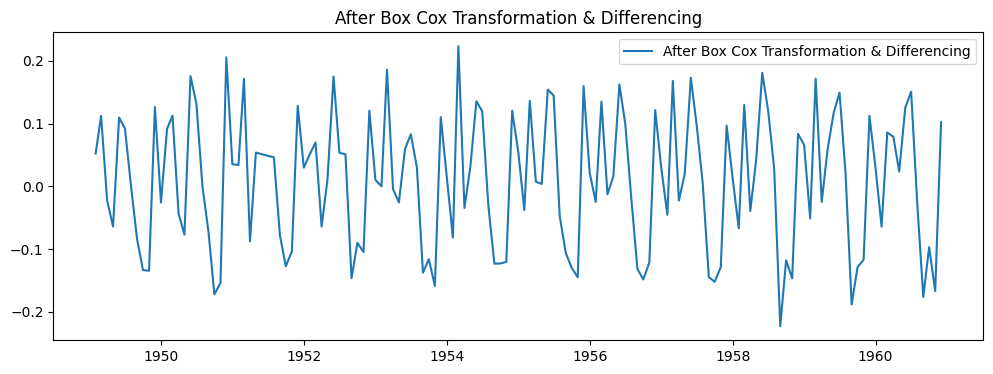

In [49]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12, 4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation & Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transformation & Differencing')
plt.show()

<a id="section-six_three_one"></a>
### ADF Test

In [50]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistics: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistics: -3.290114
Critical Value @ 0.05: -2.88
p-value: 0.015326


<a id="section-six_three_two"></a>
### KPSS Test

In [ ]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistics: %f' % kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistics: 0.101871
Critical Value @ 0.05: 0.46
p-value: 0.100000


In [51]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistics: %f' % kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistics: 0.038341
Critical Value @ 0.05: 0.46
p-value: 0.100000


<a id="section-six_three_three"></a>
### Auto-Correlation Function (ACF) Plot

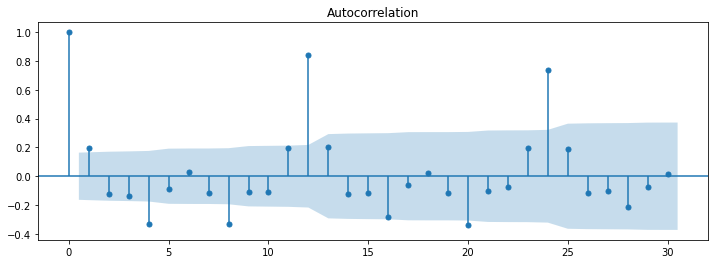

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

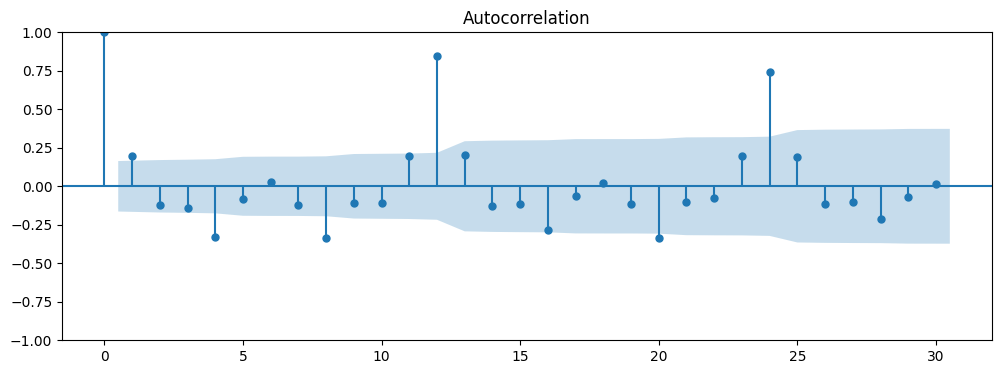

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

<a id="section-six_three_four"></a>
### Partial Auto-Correlation Function (PACF) Plot

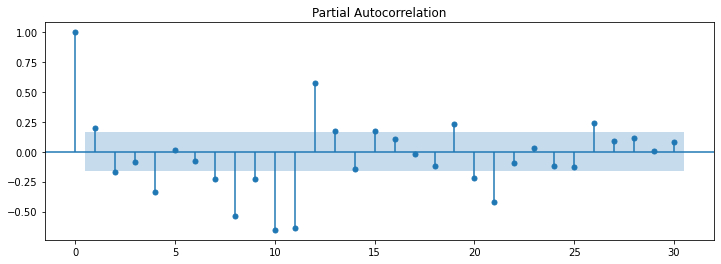

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

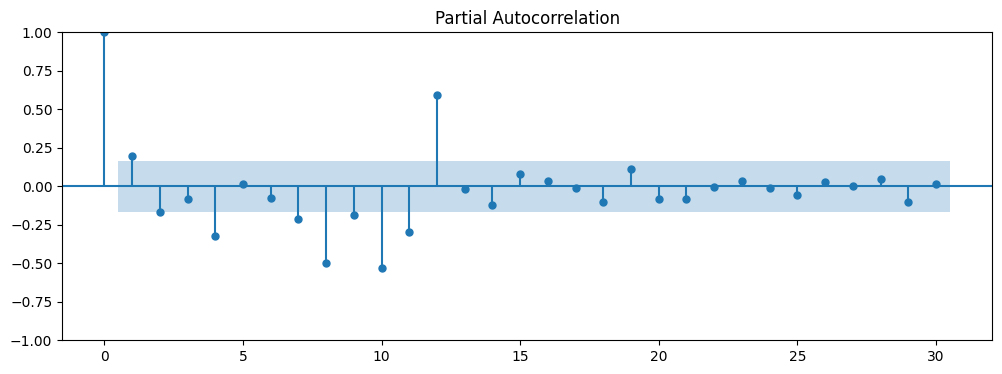

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()